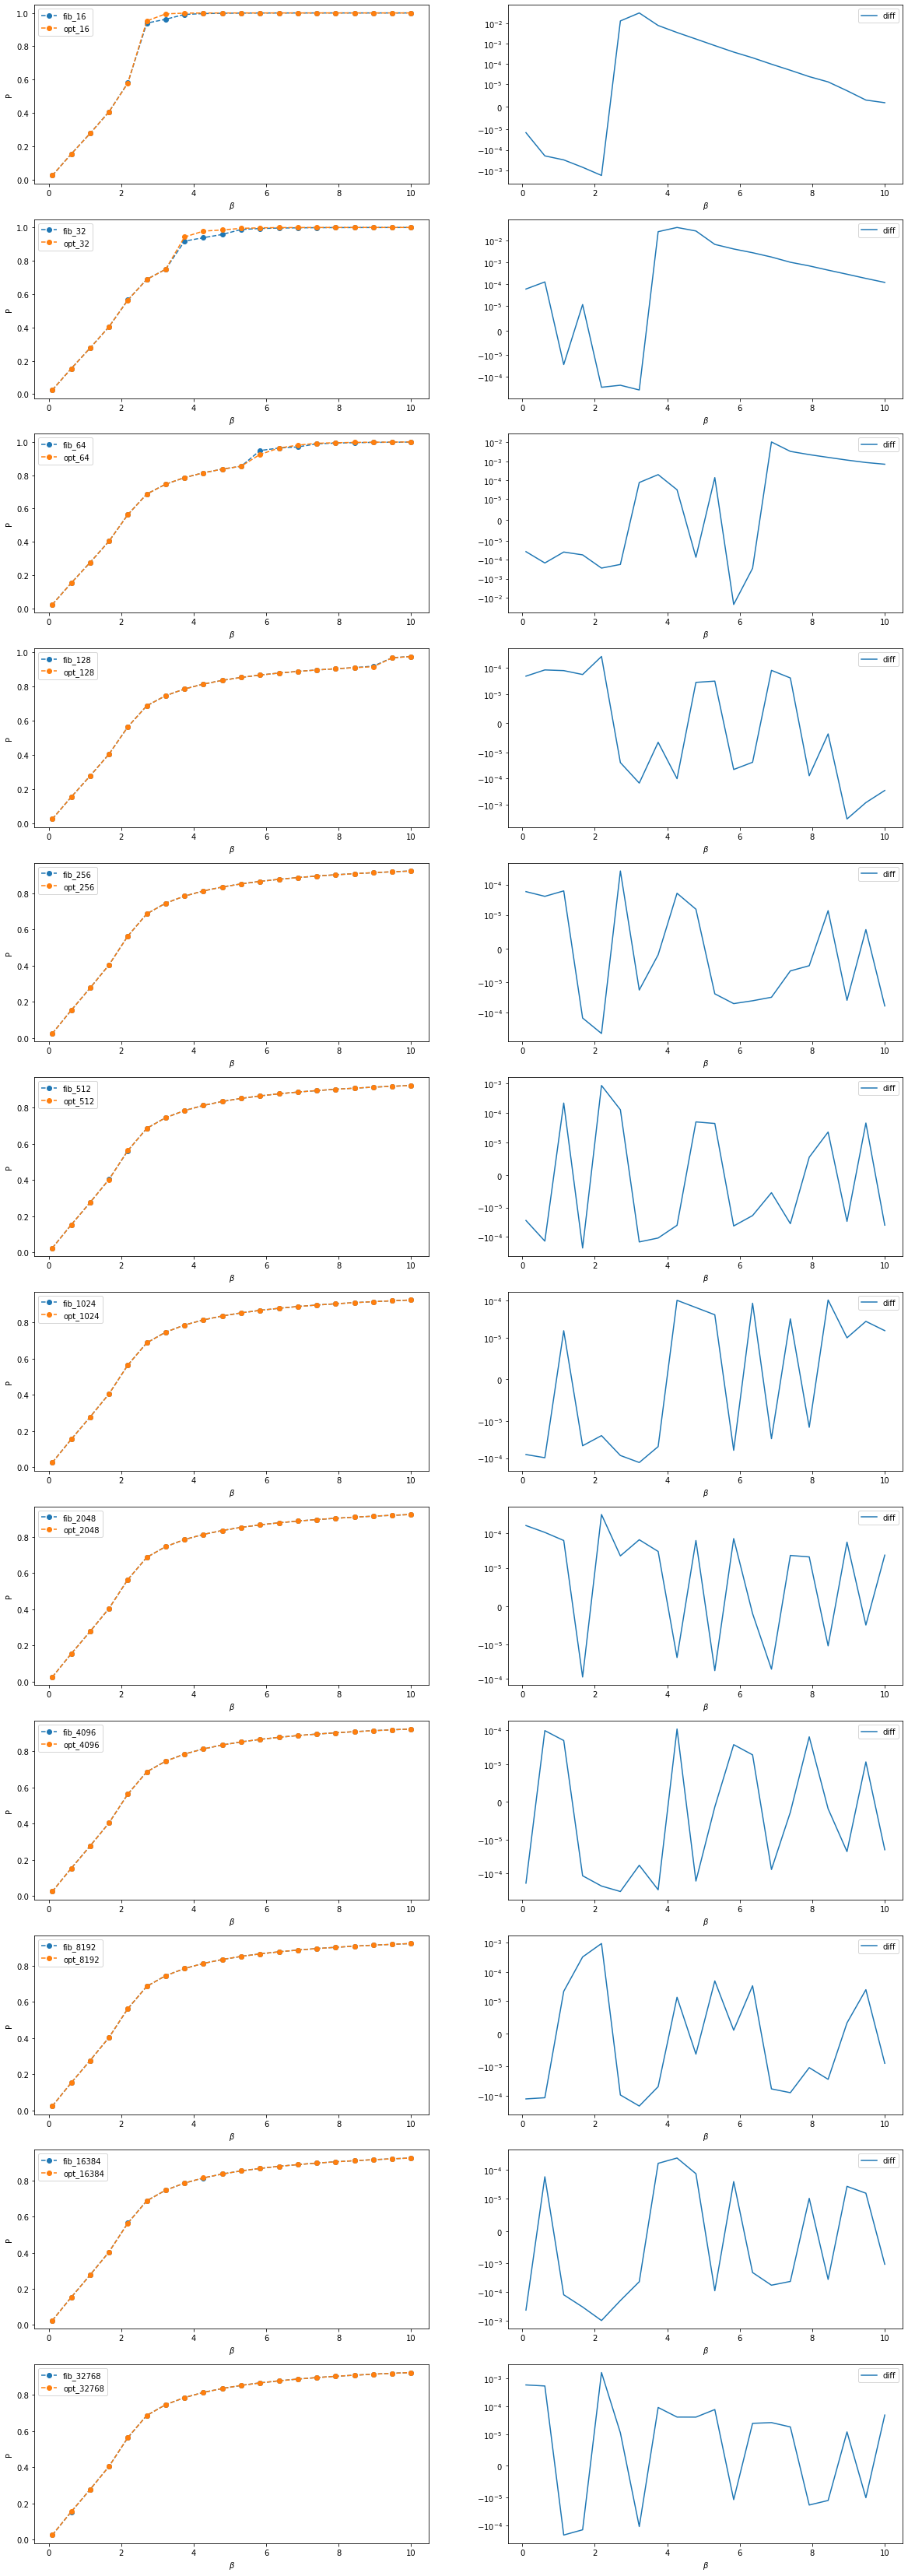

In [2]:
import pathlib 
import numpy as np
import matplotlib.pyplot as plt

def P_ref(beta):
    ''' 
    generates P_ref according to the strong and weak coupling expansion
    '''
    P = 0
    if beta < 1.21:
        koeffs = [1/4, -1/96, 7/1536, -31/23040, 4451/8847360, 
                    -264883/1486356480, 403651/5945425920,
                    -1826017873/68491306598400]
        for i in range(0,8):
            P += koeffs[i]*beta**(2*i-1)
    else:
        koeffs = [0.7498,0.1511,0.1427,0.1747,0.2435,0.368,0.5884,
                    0.98,1.6839,2.9652,5.326,9.7234,17.995,33.690,63.702]
        for i in range(1,16):
            P += koeffs[i-1]/beta**i
    return P


betas = np.linspace(0.1,10,20)
P_r = [P_ref(beta) for beta in betas]


path = pathlib.Path("su2mc_cpp/tmp_7000sweeps_5000thrown")

#np.loadtxt("fib_16.csv")
fig, axes = plt.subplots(12,2,figsize=(20,60))
for i in range(4,16):
    ax1 = axes[i-4][0]
    ax2 = axes[i-4][1]
    fib = np.loadtxt(list(path.glob(f"**/fib*{2**i}.csv"))[0], usecols=(1))
    fib_sig = np.loadtxt(list(path.glob(f"**/fib*{2**i}.csv"))[0], usecols=(2))
    opt = np.loadtxt(list(path.glob(f"**/opt*{2**i}.csv"))[0], usecols=(1))
    opt_sig = np.loadtxt(list(path.glob(f"**/opt*{2**i}.csv"))[0], usecols=(2))
    
    ax1.plot(betas, fib, "o--", label=f"fib_{2**i}")
    ax1.plot(betas, opt, "o--", label=f"opt_{2**i}")
    ax2.plot(betas, (opt-fib), label="diff")
    ax2.set_yscale("symlog", linthresh=1e-5)
    ax1.legend(loc="best")
    ax2.legend(loc="best")
    ax1.set_xlabel(r"$\beta$")
    ax1.set_ylabel(r"P")
    ax2.set_xlabel(r"$\beta$")
plt.show()